In [1]:
from sklearn.svm import SVR
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow.keras.utils as image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import colorsys
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import cv2

In [2]:
def createList(r1, r2):
    # Testing if range r1 and r2
    # are equal
    if (r1 == r2):
        return r1
    else:
        # Create empty list
        res = []
        # loop to append successors to
        # list until r2 is reached.
        while(r1 < r2+1 ): 
            res.append(r1)
            r1 += 1
    return res

In [3]:
# Load the data
csv_file = r'C:\\Users\\User\\Documents\\Year 4\\ml_mep2\\image\\image_dataset\\image_feature.csv'
df = pd.read_csv(csv_file)

df_image = []
image_width = 60
image_height = 60

for i in tqdm(range(df.shape[0])):
    img = cv2.imread(r'C:\\Users\\User\\Documents\\Year 4\\ml_mep2\\image\\image_dataset\\'+df['img_id'][i]+'.jpg')
    img = cv2.resize(img, (image_width, image_height))
    left = int(image_width*0.4)
    top = int(image_height*0.4)
    right = int(image_width*0.6)
    bottom = int(image_height*0.6)
    img = img[left:right, top:bottom]
    image_array = np.array(img)
    average_color = image_array.mean(axis=(0, 1))
    # Convert the average RGB value to HSV
    average_color = colorsys.rgb_to_hsv(*average_color)
    df_image.append(average_color)
    

X = np.array(df_image)
X /= 255

y = np.array(df['absorbance'])

100%|████████████████████████████████████████████████████████████████████████████████| 226/226 [00:20<00:00, 11.28it/s]


In [4]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R^2:  0.4922748805837547
MSE: 2.5189066142142833
MAE: 1.1249122076044662


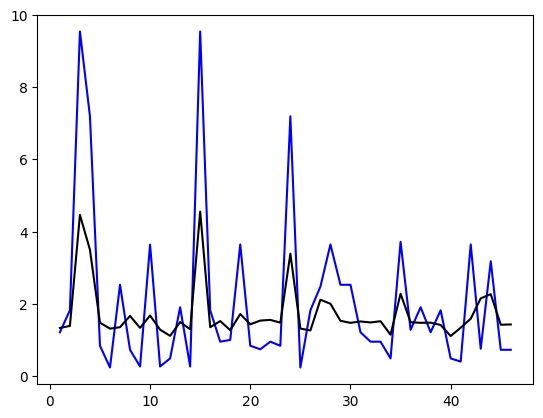

In [5]:
# Create an SVM model without grid search
model = SVR(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the validation set
score = model.score(X_test, y_test)
print('R^2: ', score)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print("MSE:", mse)
print("MAE:", mae)

#plot
x_plt = createList(1, len(y_test))

plt.plot(x_plt, y_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

In [6]:
# Set the parameters for the grid search
parameters = {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100], 'epsilon': [0.1, 0.01]}

# Create the grid search object
grid_search = GridSearchCV(SVR(), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


R^2:  0.8696844066928828
MSE: 0.6465167811550535
MAE: 0.6332454412225732


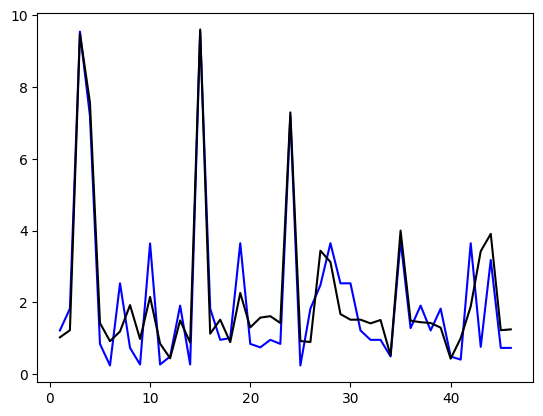

In [7]:
# Create an SVM model with the best parameters
model = SVR(**best_params)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the validation set
score = model.score(X_test, y_test)
print('R^2: ', score)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print("MSE:", mse)
print("MAE:", mae)

#plot
x_plt = createList(1, len(y_test))

plt.plot(x_plt, y_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()